# Fetch ejecta data from old simualtions with David

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import os
from matplotlib.colors import LogNorm, Normalize


In [3]:
datadir = "/media/vsevolod/Transcend/tullio_data/postprocessed5/"
SIMS = {
    "name":[
        "BLh_M13651365_M0_SR",
        "BLh_M13641364_M0_LK_SR",
        "BLh_M11841581_M0_LK_SR",
        "BLh_M11841581_M0_SR",
        "BLh_M11461635_M0_LK_SR",
        "BLh_M11041699_M0_SR",
        "BLh_M10651772_M0_LK_SR",
        "BLh_M10201856_M0_SR",
        # ----
        "DD2_M13641364_M0_SR_R04",
        "DD2_M13641364_M0_LK_SR_R04",
        "DD2_M14971245_M0_SR",
        "DD2_M15091235_M0_LK_SR",
        # ----
        "LS220_M13641364_M0_SR",
        "LS220_M13641364_M0_LK_SR_restart",
        "LS220_M14691268_M0_LK_SR",
        "LS220_M14691268_M0_SR",
        "LS220_M14351298_M0_SR",
        "LS220_M11461635_M0_LK_SR",
        "LS220_M10651772_M0_LK_SR",
        # ---- 
        "SFHo_M13641364_M0_SR",
        "SFHo_M13641364_M0_LK_SR_2019pizza",
        # ----
        "SLy4_M13641364_M0_SR",
        "SLy4_M13641364_M0_LK_SR_AHfix",
        "SLy4_M14521283_M0_SR"
    ]
}
    # {"name": "BLh_M13651365_M0_SR"},
    # {"name": "BLh_M13641364_M0_LK_SR"},
    # {"name": "BLh_M11841581_M0_LK_SR"},
    # {"name": "BLh_M11841581_M0_SR"},
    # {"name": "BLh_M11461635_M0_LK_SR"},
    # {"name": "BLh_M11041699_M0_SR"},
    # {"name": "BLh_M10651772_M0_LK_SR"},
    # {"name": "BLh_M10201856_M0_SR"},
    # # ----
    # {"name": "DD2_M13641364_M0_SR_R04"},
    # {"name": "DD2_M13641364_M0_LK_SR_R04"},
    # {"name": "DD2_M14971245_M0_SR"},
    # {"name": "DD2_M15091235_M0_LK_SR"},
    # # ----
    # {"name": "LS220_M13641364_M0_SR"},
    # {"name": "LS220_M13641364_M0_LK_SR_restart"},
    # {"name": "LS220_M14691268_M0_LK_SR"},
    # {"name": "LS220_M14691268_M0_SR"},
    # {"name": "LS220_M14351298_M0_SR"},
    # {"name": "LS220_M11461635_M0_LK_SR"},
    # {"name": "LS220_M10651772_M0_LK_SR"},
    # # ---- 
    # {"name": "SFHo_M13641364_M0_SR"},
    # {"name": "SFHo_M13641364_M0_LK_SR_2019pizza"},
    # # ----
    # {"name": "SLy4_M13641364_M0_SR"},
    # {"name": "SLy4_M13641364_M0_LK_SR_AHfix"},
    # {"name": "SLy4_M14521283_M0_SR"}
df = pd.DataFrame.from_dict(SIMS)

In [4]:
# Process Initial Data
for sim in SIMS["name"]:
    print(f"Processing {sim}")
    # load initial data file
    keys = ["R1","R2","M1","M2","Mb1","Mb2","Mb","C1","C2",
            "lam21","lam22","k22","Lambda","q","res","EOS"]
    fname = datadir+sim+'/'+"init_data.csv"
    if (os.path.isfile(fname)):
        if sim == SIMS["name"][0]:
            df = pd.read_csv(fname,names=[sim]).T
            df = df[keys]
        else:
            row = pd.read_csv(fname,names=[sim]).T
            row = row[keys]
            df = pd.concat([df, row])

Processing BLh_M13651365_M0_SR
Processing BLh_M13641364_M0_LK_SR
Processing BLh_M11841581_M0_LK_SR
Processing BLh_M11841581_M0_SR
Processing BLh_M11461635_M0_LK_SR
Processing BLh_M11041699_M0_SR
Processing BLh_M10651772_M0_LK_SR
Processing BLh_M10201856_M0_SR
Processing DD2_M13641364_M0_SR_R04
Processing DD2_M13641364_M0_LK_SR_R04
Processing DD2_M14971245_M0_SR
Processing DD2_M15091235_M0_LK_SR
Processing LS220_M13641364_M0_SR
Processing LS220_M13641364_M0_LK_SR_restart
Processing LS220_M14691268_M0_LK_SR
Processing LS220_M14691268_M0_SR
Processing LS220_M14351298_M0_SR
Processing LS220_M11461635_M0_LK_SR
Processing LS220_M10651772_M0_LK_SR
Processing SFHo_M13641364_M0_SR
Processing SFHo_M13641364_M0_LK_SR_2019pizza
Processing SLy4_M13641364_M0_SR
Processing SLy4_M13641364_M0_LK_SR_AHfix
Processing SLy4_M14521283_M0_SR


In [5]:
from david_data import Ejecta
solar_m = 1.989e+33
c = 2.9979e10
get_beta = lambda Gamma: np.sqrt(1. - np.power(Gamma, -2))
get_Gamma = lambda beta: np.float64(np.sqrt(1. / (1. - np.float64(beta) ** 2.)))

BLh_M13651365_M0_SR theta_rms=30.78 mass=4.23e-09 vave=0.72 ek=3.92e+45
BLh_M13641364_M0_LK_SR theta_rms=66.26 mass=7.89e-06 vave=0.76 ek=8.15e+48
BLh_M11841581_M0_SR theta_rms=84.49 mass=4.62e-09 vave=0.72 ek=4.28e+45
BLh_M11041699_M0_SR theta_rms=11.02 mass=7.67e-10 vave=0.72 ek=7.11e+44
BLh_M10201856_M0_SR theta_rms=26.86 mass=3.72e-07 vave=0.82 ek=4.52e+47
DD2_M13641364_M0_SR_R04 theta_rms=75.75 mass=3.74e-08 vave=0.72 ek=3.47e+46
DD2_M15091235_M0_LK_SR theta_rms=86.66 mass=8.34e-07 vave=0.74 ek=8.09e+47
LS220_M14691268_M0_SR theta_rms=51.11 mass=1.38e-08 vave=0.72 ek=1.28e+46
LS220_M14351298_M0_SR theta_rms=46.22 mass=1.44e-06 vave=0.74 ek=1.43e+48
LS220_M11461635_M0_LK_SR theta_rms=14.54 mass=1.78e-06 vave=0.74 ek=1.75e+48
LS220_M10651772_M0_LK_SR theta_rms=40.14 mass=4.73e-05 vave=0.81 ek=5.58e+49
SFHo_M13641364_M0_SR theta_rms=35.65 mass=1.02e-05 vave=0.77 ek=1.08e+49
SFHo_M13641364_M0_LK_SR_2019pizza theta_rms=36.42 mass=6.38e-06 vave=0.76 ek=6.52e+48
SLy4_M13641364_M0_SR thet

/tmp/ipykernel_682416/2450878554.py:5: RuntimeWarning: divide by zero encountered in divide
  get_Gamma = lambda beta: np.float64(np.sqrt(1. / (1. - np.float64(beta) ** 2.)))
/tmp/ipykernel_682416/2450878554.py:5: RuntimeWarning: invalid value encountered in sqrt
  get_Gamma = lambda beta: np.float64(np.sqrt(1. / (1. - np.float64(beta) ** 2.)))


,R1,R2,M1,M2,Mb1,Mb2,Mb,C1,C2,lam21,lam22,k22,Lambda,q,res,EOS,vave,theta_rms,mass,ek
BLh_M13651365_M0_SR,8.419238436123347,8.419238436123347,1.365,1.365,1.493,1.493,2.986,0.16060418502202645,0.16060418502202645,541.7018607929513,541.7018607929513,0.08664591966960351,541.7018607929513,1.0,SR,BLh,0.720000,30.782058,4.234228e-09,3.923813e+45
BLh_M13641364_M0_LK_SR,8.419238436123347,8.419238436123347,1.364,1.364,1.493,1.493,2.986,0.16060418502202645,0.16060418502202645,541.7018607929513,541.7018607929513,0.08664591966960351,541.7018607929513,1.0,SR,BLh,0.759306,66.258121,7.887131e-06,8.147085e+48
BLh_M11841581_M0_LK_SR,8.306039420612812,8.477397093757675,1.581,1.184,1.762,1.277,3.0389999999999997,0.18866303621169916,0.13837779571213024,196.17187938718666,1299.4562525702659,0.09873336902347452,539.1503721182672,1.3353040540540542,SR,BLh,NaN,NaN,NaN,NaN
BLh_M11841581_M0_SR,8.307554925745736,8.47807848313123,1.581,1.184,1.762,1.277,3.0389999999999997,0.18862799558106233,0.1383671957811774,196.01447005568426,1297.255681019288,0.09869978116131302,539.1,1.3353040540540542,SR,BLh,0.720000,84.489796,4.618034e-09,4.279481e+45
BLh_M11461635_M0_LK_SR,8.263596716143278,8.485080551141253,1.635,1.146,1.832,1.232,3.064,0.1962084543670265,0.13377369814438667,151.4750158488714,1576.4818248700387,0.10111985542052536,540.1768804395066,1.4267015706806283,SR,BLh,NaN,NaN,NaN,NaN
BLh_M11041699_M0_SR,8.209663854906225,8.495096853977108,1.699,1.104,1.915,1.184,3.099,0.20524499103017124,0.12880728804911648,111.52315870073389,1962.459173370296,0.10335325734791409,543.9697609522354,1.5389492753623188,SR,BLh,0.720000,11.020408,7.674729e-10,7.112088e+44
BLh_M10651772_M0_LK_SR,8.144277317065777,8.503015658808538,1.772,1.065,2.01,1.138,3.1479999999999997,0.21568578357077903,0.124058697037273,78.26673312215824,2411.8436699585864,0.10544653698630138,538.4148737180547,1.663849765258216,SR,BLh,NaN,NaN,NaN,NaN
BLh_M10201856_M0_SR,8.037571818700197,8.511501002260339,1.856,1.02,2.124,1.086,3.21,0.2290126507785657,0.11867605903470285,50.508594664814666,3054.27677582768,0.10762178477596063,532.9548956373667,1.8196078431372549,SR,BLh,0.821424,26.864962,3.717904e-07,4.518169e+47
DD2_M13641364_M0_SR_R04,8.944563114789652,8.944563114789652,1.364,1.364,1.4873,1.4873,2.9746,0.15118054986181484,0.15118054986181484,853.8301878550589,853.8301878550589,0.10069386667914171,853.830187855059,1.0,SR,DD2,0.720000,75.750262,3.741853e-08,3.467535e+46
DD2_M13641364_M0_LK_SR_R04,8.944563114789652,8.944563114789652,1.364,1.364,1.4873,1.4873,2.9746,0.15118054986181484,0.15118054986181484,853.8301878550589,853.8301878550589,0.10069386667914171,853.830187855059,1.0,SR,DD2,NaN,NaN,NaN,NaN


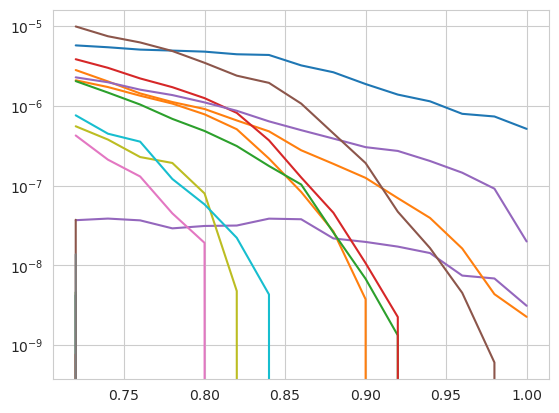

In [96]:
# Process Ejecta Data
datadir_ = "/outflow_1/geo/"
result = {}
for sim in SIMS["name"]:
    fpath = datadir+sim+'/'+datadir_
    if (os.path.isdir(fpath)):

        dfile = h5py.File(fpath+"corr_vel_inf_theta.h5", mode="r")
        # dfile2 = h5py.File(fpath+"corr_Y_e_theta.h5", mode="r")
        
        # print(dfile2.keys())
        
        theta = np.array(dfile["theta"])
        vinf = np.array(dfile["vel_inf"])
        mass = np.array(dfile["mass"])

        # theta2 = np.array(dfile2["theta"])
        # ye = np.array(dfile2["ye"])
        
        
        # print(theta)
        # print(theta2)
        # break

        # theta = 0.5 * (theta[1:] + theta[:1])
        theta = theta[1:]#0.5 * (theta[1:] + theta[:1])
        vinf = vinf[1:]
        # vinf = 0.5 * (vinf[1:] + vinf[:1])
        
        # print(theta.shape, vinf.shape, mass.shape)

        mass = mass[:, theta < np.pi / 2]
        theta = theta[theta < np.pi / 2]
        mass = mass * 2

        mom = vinf * get_Gamma(vinf)
        # print(mom)
        # print(vinf)
        mass = mass[mom > 1.0, :]
        vinf = vinf[mom > 1.0]
    
        
        if len(vinf) > 2 and np.sum(mass) > 0:

            theta -= np.pi / 2.
            plt.semilogy(vinf, np.sum(mass, axis=1))
            # plt.semilogy(theta, np.sum(mass, axis=0))
    
            
            theta_rms = (180. / np.pi) * np.sqrt(np.sum(np.sum(mass, axis=0) * theta ** 2) / np.sum(mass))
            value = np.float64(theta_rms)
    
            vave = np.sum(vinf * np.sum(mass, axis=1)) / np.sum(mass)
            # print("\n")
            # print(f"{sim} theta_rms={value:.2f} mass={np.sum(mass)} vave={vave}")
            # ej = Ejecta(fpath)
            # print(f"{sim} theta_rms={ej.get_theta_rms():.2f} "
            #       f"mass={ej.get_tot_mass()} vace={ejecta.get_vej_ave()}")


            solar_m = 1.989e+33
            c = 2.9979e10
            result[sim] = {
                "vave":vave,
                "theta_rms":90.-theta_rms, # polar angle 
                "mass":np.sum(mass),
                "ek": np.sum( mass * solar_m * (vinf[:, np.newaxis] * c) ** 2 )
            }
            print(f"{sim} "
                  f"theta_rms={result[sim]['theta_rms']:.2f} "
                  f"mass={result[sim]['mass']:.2e} "
                  f"vave={result[sim]['vave']:.2f} "
                  f"ek={result[sim]['ek']:.2e}")
df_ej = pd.DataFrame.from_dict(result).T
# df_ej.set_index("name")
df.join(df_ej, how="left")   
# df_ej

In [101]:
df.reset_index()
df.index.names = ["name"]
df.to_csv("./knafg_kenta/out/david_data.csv",index=True)

In [ ]:
# Process Ejecta Data
datadir_ = "/outflow_1/geo/"
for sim in SIMS["name"]:
    fname = datadir+sim+'/'+datadir_
    if (os.path.isdir(fname)):
        ejecta = Ejecta(fname)
        theta, vinf, mass = ejecta.load_corr_file()
        print(theta.shape, vinf.shape, mass.shape)
        
        
        
        
        # mass_vs_vinf = np.sum(mass, axis=1)
        # mass_vs_theta = np.sum(mass, axis=0)
        
        theta = 0.5 * (theta[1:] + theta[:1])
        # vinf = 0.5 * (vinf[1:] + vinf[:1])
        
        # plt.semilogy(theta, np.sum(mass, axis=0))
        
        # mass *= 2 # remove second hemisphere
        mass = mass[:, theta < np.pi / 2]
        theta = theta[theta < np.pi / 2]
        
        # print(theta)
        # print(theta.shape, vinf.shape, mass.shape)
        
        mom = vinf * get_Gamma(vinf)
        mass = mass[:, mom > 0.]
        vinf = vinf[mom > 0.]
        
        # Compute Theta_RMS
        mass_vs_theta = np.sum(mass, axis=0)
        print(theta.shape, vinf.shape, mass.shape)
        plt.semilogy(theta, mass_vs_theta)
        
        theta -= np.pi / 2.
        theta_rms = (180. / np.pi) * np.sqrt(np.sum(mass_vs_theta * theta ** 2) / np.sum(mass_vs_theta))
        value = 90. - np.float64(theta_rms)
        #  return (value) # [degrees]
        # print(np.sum(mass, axis=0))
        
        # plt.semilogy(vinf, mass_vs_vinf)
        mass_vs_vinf = np.sum(mass, axis=1)
        vave = np.sum(vinf * mass_vs_vinf) / np.sum(mass_vs_vinf)
        
        print(f"{sim} theta_rms={value:.2f} mass={np.sum(mass)} vave={vave}")
        print(f"{sim} theta_rms={ejecta.get_theta_rms():.2f} "
              f"mass={ejecta.get_tot_mass()} vace={ejecta.get_vej_ave()}")
        
        
        break
        
        
        
        # print(theta.shape, vinf.shape, mass.shape)
        # 
        # mass = 2.0 * mass / np.sum(mass)
        # ek = []
        # for i in range(len(mass[0,:])):
        #     ek.append(mass[i, :] * solar_m * (vinf * c) ** 2)
        # ek = np.vstack((ek))
        # 
        # mass = np.maximum(mass, 1e-15)
        # # ek = np.maximum(mass, ek)
        # 
        # theta = 180 * theta / np.pi
        # theta -= theta[0]
        # 
        # 
        # 
        # 
        # 
        # # --------------------
        # 
        # fig = plt.figure(figsize=(4.5+1, 3.6+2))
        # # fig.suptitle(r"BLh* $(1.259+1.482)M_{\odot}$")
        # 
        # ax0 = fig.add_axes([0.16, 0.12, 0.81 - 0.15, 0.59 - 0.12])
        # ax1 = fig.add_axes([0.16, 0.61, 0.81 - 0.15, 0.91 - 0.61])
        # cax = fig.add_axes([0.83, 0.12, 0.86 - 0.83, 0.59 - 0.12])
        # 
        # norm = LogNorm(1e-4, 1e-2)
        # im = ax0.pcolormesh(vinf, theta, mass, norm=norm, cmap='RdBu_r')
        # im.set_rasterized(True)
        # 
        # ax0.axvline(x=0.6, linestyle='-', color='limegreen')
        # 
        # ax0.set_ylim(0.0, 90)
        # ax0.set_xlim(0.05, 0.95)
        # 
        # ax0.set_xlabel(r"$\upsilon_{\infty}$", fontsize=14)
        # ax0.set_ylabel(r"Polar angle", fontsize=14)
        # ax0.get_yaxis().set_label_coords(-0.15, 0.5)
        # 
        # ax0.tick_params(axis='both', which='both', labelleft=True,
        #                 labelright=False, tick1On=True, tick2On=True,
        #                 labelsize=12,
        #                 direction='in',
        #                 bottom=True, top=True, left=True, right=True)
        # 
        # # ax0.text(0.05, 0.05, models.print_fancy_label(name),
        # #        color='white', transform=ax0.transAxes)
        # 
        # mdens = np.sum(mass, axis=0)
        # #ax1.step(0.5 * (theta[1:] + theta[:-1]), mdens, where='mid', color='red')
        # ax1.step(vinf, mdens, where='mid', color='red')
        # 
        # 
        # # fit *= np.sum(mdens) / np.sum(fit)
        # # fit_x, fit_y = _fit(vinf, mdens)
        # # ax1.plot(fit_x, fit_y, 'k--', label=r'$\sin^2(\theta)$')
        # ax1.legend(loc='upper left')
        # 
        # 
        # ax1.set_yscale("log")
        # ax1.set_ylim(1e-3, 3e-1)
        # # ax1.yaxis.tick_right()
        # # ax1.yaxis.tick_left()
        # ax1.set_ylabel(r"Mass fraction", fontsize=14)
        # ax1.get_yaxis().set_label_coords(-0.15, 0.5)
        # 
        # ax1.set_xlim(0.05, 0.95)
        # ax1.xaxis.set_ticklabels([])
        # 
        # ax1.tick_params(axis='both', which='both', labelleft=True,
        #                 labelright=False, tick1On=True, tick2On=True,
        #                 labelsize=12,
        #                 direction='in',
        #                 bottom=True, top=True, left=True, right=True)
        # 
        # cbar = plt.colorbar(im, cax=cax, norm=norm)
        # cbar.set_label(r"Mass fraction", fontsize=14)
        # cbar.ax.minorticks_off()
        # # plt.savefig(FIGPATH+"test.png")
        # #plt.savefig(sys.argv[0].replace(".py", "_") + name.lower() + ".pdf")
        # plt.show()
        # plt.close()
    